<a href="https://colab.research.google.com/github/mashyko/object_detection/blob/master/Yolo_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YOLO(You Only Look Once) in PyTorch framework

In [0]:
# パッケージのimport
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms


In [29]:
! git clone https://github.com/mashyko/pytorch-yolo-v3

Cloning into 'pytorch-yolo-v3'...
remote: Enumerating objects: 490, done.
remote: Total 490 (delta 0), reused 0 (delta 0), pack-reused 490
Receiving objects: 100% (490/490), 2.40 MiB | 13.13 MiB/s, done.
Resolving deltas: 100% (302/302), done.


In [30]:
%cd pytorch-yolo-v3

/content/pytorch-yolo-v3/pytorch-yolo-v3


In [31]:
!wget https://pjreddie.com/media/files/yolov3.weights 

--2020-05-06 03:19:39--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   433KB/s    in 10m 13s 

2020-05-06 03:29:53 (395 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



物体検出にはコード 'detect.py' を使います。オプションを見るために、



In [32]:
!python detect.py -h

usage: detect.py [-h] [--images IMAGES] [--det DET] [--bs BS]
                 [--confidence CONFIDENCE] [--nms_thresh NMS_THRESH]
                 [--cfg CFGFILE] [--weights WEIGHTSFILE] [--reso RESO]
                 [--scales SCALES]

YOLO v3 Detection Module

optional arguments:
  -h, --help            show this help message and exit
  --images IMAGES       Image / Directory containing images to perform
                        detection upon
  --det DET             Image / Directory to store detections to
  --bs BS               Batch size
  --confidence CONFIDENCE
                        Object Confidence to filter predictions
  --nms_thresh NMS_THRESH
                        NMS Threshhold
  --cfg CFGFILE         Config file
  --weights WEIGHTSFILE
                        weightsfile
  --reso RESO           Input resolution of the network. Increase to increase
                        accuracy. Decrease to increase speed
  --scales SCALES       Scales to use for detection


In [33]:
!ls imgs

dog.jpg    giraffe.jpg	       img1.jpg  img3.jpg  messi.jpg   scream.jpg
eagle.jpg  herd_of_horses.jpg  img2.jpg  img4.jpg  person.jpg


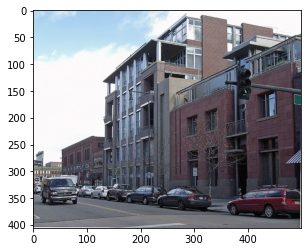

In [38]:
#  画像読み込み
image_file_path = 'imgs/img3.jpg'
img = Image.open(image_file_path)  # [高さ][幅][色RGB]

#  元の画像の表示
plt.imshow(img)
plt.show()

In [39]:
!python detect.py --images imgs/img3.jpg --det det

Loading network.....
Network successfully loaded
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)
img3.jpg             predicted in  1.207 seconds
Objects Detected:    car car car car car car car truck traffic light
----------------------------------------------------------

SUMMARY
----------------------------------------------------------
Task                     : Time Taken (in seconds)

Reading addresses        : 0.000
Loading batch            : 1.452
Detection (1 images)     : 1.208
Output Processing        : 0.000
Drawing Boxes            : 0.008
Average time_per_img     : 2.668
----------------------------------------------------------


In [41]:
!ls det

det_img3.jpg


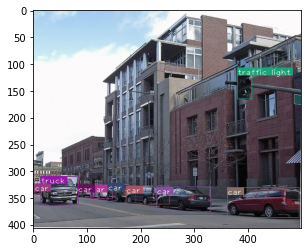

In [42]:


#  画像読み込み
image_file_path = 'det/det_img3.jpg'
img = Image.open(image_file_path)  # [高さ][幅][色RGB]

#  元の画像の表示
plt.imshow(img)
plt.show()


